In [2]:
import importlib
import utils
import visualization

importlib.reload(utils)
importlib.reload(visualization)
%reload_ext autoreload
%autoreload 2
from utils import *
from visualization import visualize
pd.set_option('display.max_colwidth', None)


In [3]:
# incorrect cases with different sku for same products
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"

grouped_confident, grouped_review = process_excel_for_duplicates_and_split_by_company(
    excel_path,
    confidence_threshold=93,
    low_confidence_threshold=88
)

for company, df in grouped_confident.items():
    print(f"--- Confident matches for {company} ---")
    print(df.shape)

for company, df in grouped_review.items():
    print(f"--- Needs review matches for {company} ---")
    print(df.shape)


--- Confident matches for Surtiventas Arbol_24_25 ---
(39, 10)
--- Confident matches for PRISA Arbol_24_25 ---
(22, 10)
--- Confident matches for Prinorte Arbol_24_25 ---
(8, 10)
--- Confident matches for Prisur Arbol_24_25 ---
(47, 10)
--- Needs review matches for Surtiventas Arbol_24_25 ---
(22, 10)
--- Needs review matches for PRISA Arbol_24_25 ---
(16, 10)
--- Needs review matches for Prinorte Arbol_24_25 ---
(8, 10)
--- Needs review matches for Prisur Arbol_24_25 ---
(24, 10)


In [14]:
# Correct cases with same and different names
data = load_all_sheets(excel_path)

correct_products = find_similar_products(data, 90, different_sku=False)
correct_products = correct_products.copy()
correct_products = remove_flavor_variants(correct_products)
columns_to_show = [col for col in correct_products.columns if col not in ['Numbers 1', 'Numbers 2']]
correct_products = correct_products.loc[:, columns_to_show]
exact_matches = correct_products[correct_products['Similarity'] == 100]
partial_matches = correct_products[correct_products['Similarity'] < 100]
grouped_exact, grouped_partial = split_matches_by_company(exact_matches, partial_matches)

# Print or explore
for company, df in grouped_exact.items():
    print(f"\n--- Exact matches for {company} ---")
    print(df.shape[0])

for company, df in grouped_partial.items():
    print(f"\n--- Partial matches for {company} ---")
    print(df.shape[0])



--- Exact matches for Prinorte Arbol_24_25 ---
91

--- Exact matches for PRISA Arbol_24_25 ---
46

--- Exact matches for Surtiventas Arbol_24_25 ---
182

--- Exact matches for Prisur Arbol_24_25 ---
209

--- Partial matches for Prinorte Arbol_24_25 ---
47

--- Partial matches for PRISA Arbol_24_25 ---
65

--- Partial matches for Surtiventas Arbol_24_25 ---
147

--- Partial matches for Prisur Arbol_24_25 ---
131


In [15]:
91+46+182+209
# cada erroe involucra 2 subempresas  por es0 582 = 264 * 2 del reporte integral

528

In [18]:
47+65+147+131

390

In [16]:

all_companies = set(grouped_confident) | set(grouped_review) | set(grouped_exact) | set(grouped_partial)
all_companies = list(all_companies)

company_shapes = {}
for company in all_companies:
    review_shape = grouped_review.get(company, pd.DataFrame()).shape
    confident_shape = grouped_confident.get(company, pd.DataFrame()).shape
    exact_shape = grouped_exact.get(company, pd.DataFrame()).shape
    partial_shape = grouped_partial.get(company, pd.DataFrame()).shape

    company_shapes[company] = [review_shape[0], confident_shape[0], exact_shape[0], partial_shape[0]]



In [8]:
company_shapes


{'Prinorte Arbol_24_25': [8, 8, 91, 47],
 'Surtiventas Arbol_24_25': [22, 39, 182, 147],
 'PRISA Arbol_24_25': [16, 22, 46, 65],
 'Prisur Arbol_24_25': [24, 47, 209, 131]}

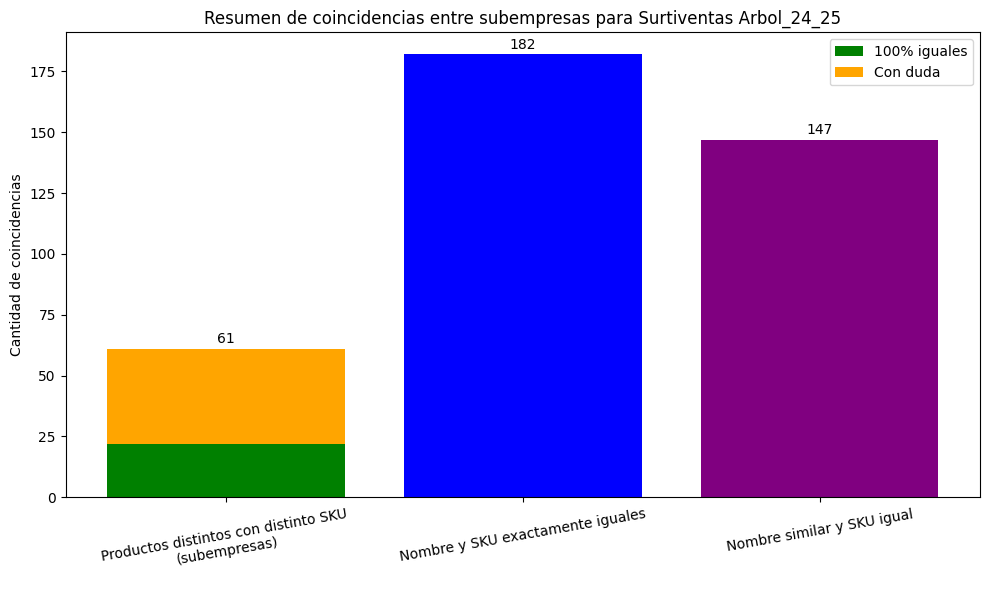

In [9]:
company = "Surtiventas Arbol_24_25"
review, confident, exact, partial = company_shapes[company]

visualize(review, confident, exact, partial, company)


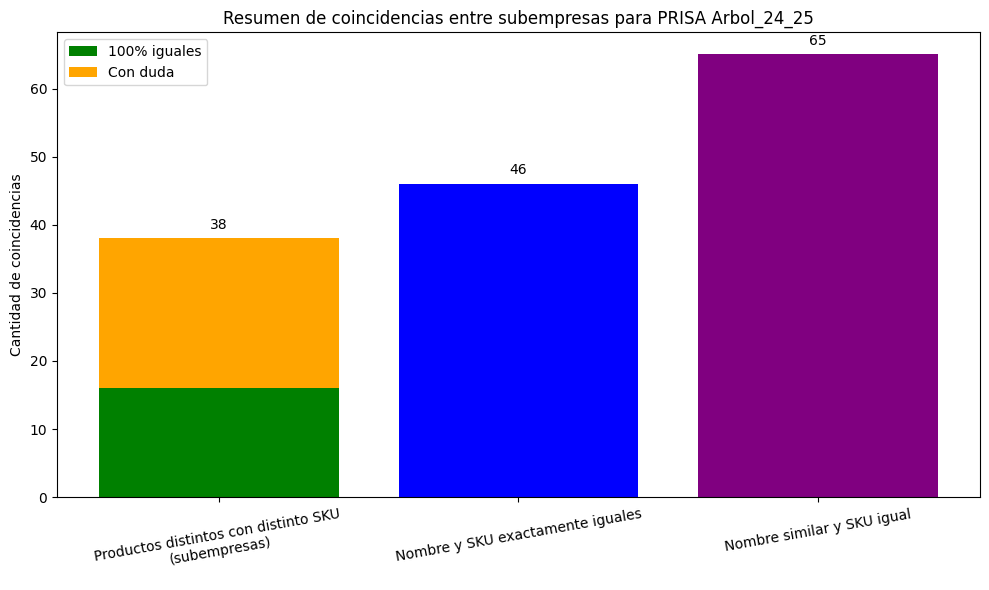

In [10]:
company = "PRISA Arbol_24_25"
review, confident, exact, partial = company_shapes[company]

visualize(review, confident, exact, partial, company)

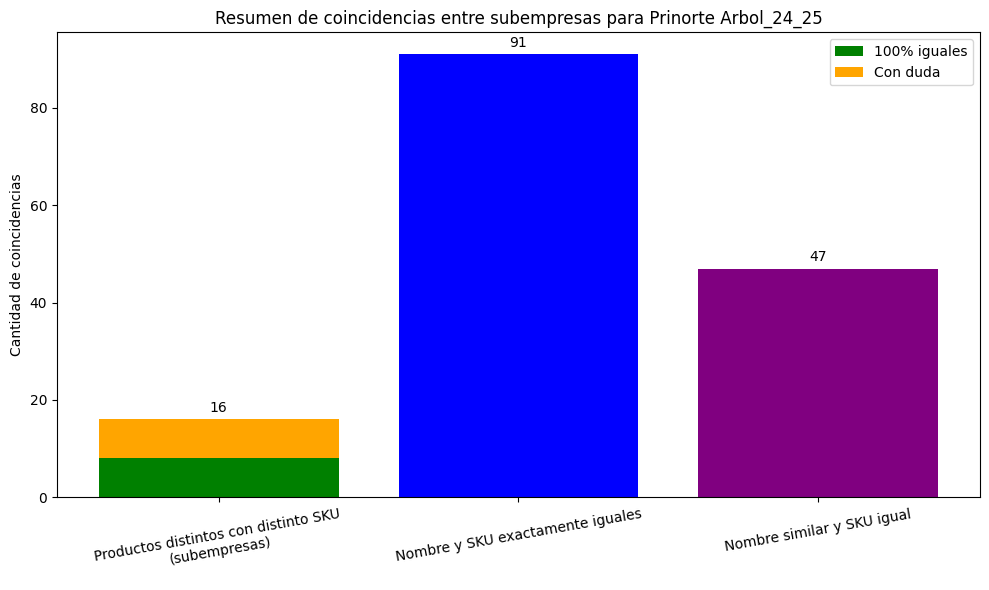

In [11]:
company = "Prinorte Arbol_24_25"
review, confident, exact, partial = company_shapes[company]

visualize(review, confident, exact, partial, company)

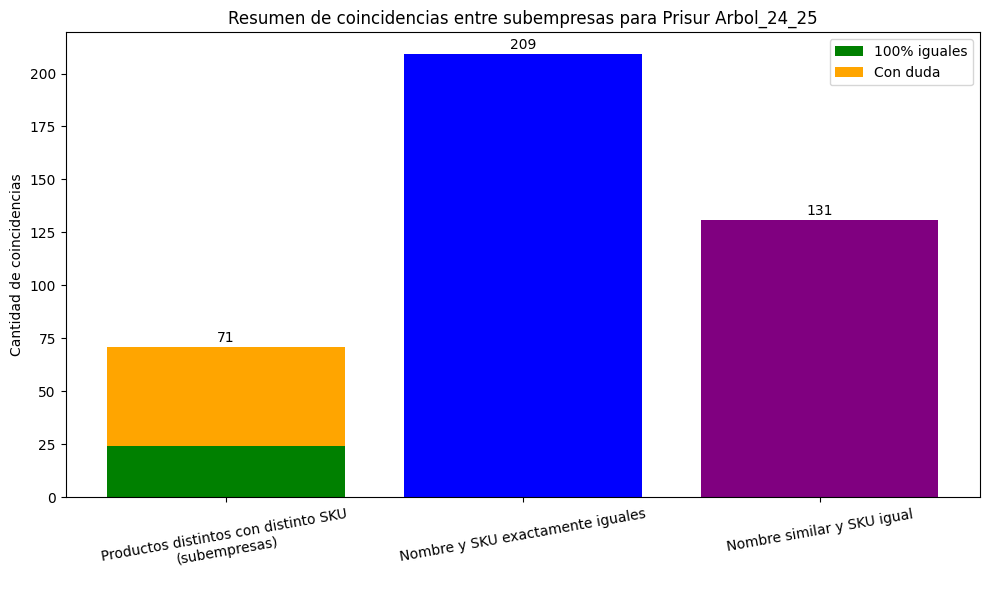

In [12]:
company = "Prisur Arbol_24_25"
review, confident, exact, partial = company_shapes[company]

visualize(review, confident, exact, partial, company)